In [40]:
from rembg import remove
from PIL import Image, ImageFilter
import cv2
import numpy as np
from matplotlib import pyplot as plt


Remove Background


In [41]:
# 移除背景
input_path = "../High Resolution Pic/Big ben.jpeg"
output_path = "../Processed Pic/London/Big_ben_no_background.png"

input_image = Image.open(input_path)
output_image = remove(input_image)
output_image.save(output_path)

# 移除背景
input_path = "../Pic/London/gear.png"
output_path = "../Processed Pic/London/gear_no_background.png"

input_image = Image.open(input_path)
output_image = remove(input_image)
output_image.save(output_path)



Read Photo

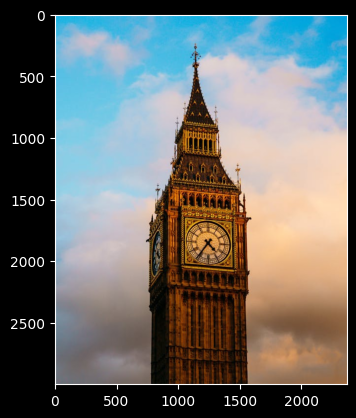

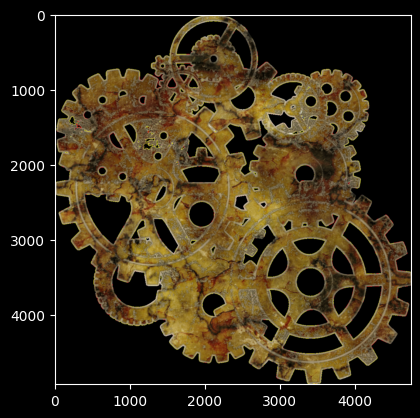

In [11]:
# 读取图像
image_path = "../High Resolution Pic/Big ben.jpeg"
image = cv2.imread(image_path)

# 转换颜色空间
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 显示图像
plt.imshow(image_rgb)
plt.show()


# 读取图像
image_path = "../High Resolution Pic/gear.png"
image = cv2.imread(image_path)

# 转换颜色空间
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 显示图像
plt.imshow(image_rgb)
plt.show()



Overlay

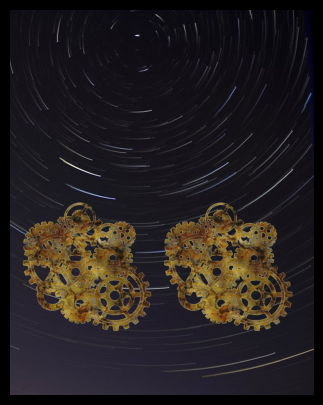

In [49]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取底层图像和覆盖图像
background_image_path = "../High Resolution Pic/star.jpeg"
overlay_image_path = "../Pic/London/gear.png"  # 替换为你的齿轮图片路径

background = cv2.imread(background_image_path)
overlay = cv2.imread(overlay_image_path, cv2.IMREAD_UNCHANGED)

# 检查图像是否正确加载
if background is None:
    raise FileNotFoundError(f"无法加载背景图像：{background_image_path}")
if overlay is None:
    raise FileNotFoundError(f"无法加载覆盖图像：{overlay_image_path}")

# 调整覆盖图像的大小
overlay = cv2.resize(overlay, (1000, 1000))  # 根据需要调整大小

# 获取覆盖图像的 RGB 通道（忽略透明度）
if overlay.shape[2] == 4:  # 如果有 alpha 通道，去掉 alpha 通道
    b, g, r, a = cv2.split(overlay)
    overlay_rgb = cv2.merge((b, g, r))
    # 使用alpha通道作为掩码
    mask = (a > 0)
else:
    overlay_rgb = overlay
    mask = np.ones((overlay.shape[0], overlay.shape[1]), dtype=bool)  # 全部区域有效

# 定义粘贴位置
x_offset, y_offset = 100 , 1500

# 获取背景图像的感兴趣区域 (ROI)
rows, cols, _ = overlay_rgb.shape

# 检查 ROI 尺寸是否匹配
if y_offset + rows > background.shape[0] or x_offset + cols > background.shape[1]:
    raise ValueError("覆盖图像超出了背景图像的范围")

# 叠加图像
for c in range(0, 3):  # 遍历 RGB 三个通道
    background[y_offset:y_offset+rows, x_offset:x_offset+cols, c] = overlay_rgb[:, :, c] * (mask) + background[y_offset:y_offset+rows, x_offset:x_offset+cols, c] * (~mask)
    

# 定义粘贴位置
x_offset, y_offset = 1200 , 1500

# 获取背景图像的感兴趣区域 (ROI)
rows, cols, _ = overlay_rgb.shape

# 检查 ROI 尺寸是否匹配
if y_offset + rows > background.shape[0] or x_offset + cols > background.shape[1]:
    raise ValueError("覆盖图像超出了背景图像的范围")

# 叠加图像
for c in range(0, 3):  # 遍历 RGB 三个通道
    background[y_offset:y_offset+rows, x_offset:x_offset+cols, c] = overlay_rgb[:, :, c] * (mask) + background[y_offset:y_offset+rows, x_offset:x_offset+cols, c] * (~mask)

# 保存并显示合成后的图像
output_path = "../Processed Pic/London/result.png"
cv2.imwrite(output_path, background)

# 显示图像
plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(background, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


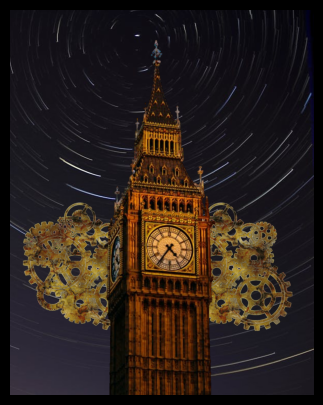

In [50]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取底层图像和覆盖图像
background_image_path = "../Processed Pic/London/result.png"
overlay_image_path = "../Processed Pic/London/Big ben-Photoroom.png"  # 替换为你的齿轮图片路径

background = cv2.imread(background_image_path)
overlay = cv2.imread(overlay_image_path, cv2.IMREAD_UNCHANGED)

# 检查图像是否正确加载
if background is None:
    raise FileNotFoundError(f"无法加载背景图像：{background_image_path}")
if overlay is None:
    raise FileNotFoundError(f"无法加载覆盖图像：{overlay_image_path}")

# 调整覆盖图像的大小
overlay = cv2.resize(overlay, (2368, 3000))  # 根据需要调整大小


# 获取覆盖图像的 RGB 通道（忽略透明度）
if overlay.shape[2] == 4:  # 如果有 alpha 通道，去掉 alpha 通道
    b, g, r, a = cv2.split(overlay)
    overlay_rgb = cv2.merge((b, g, r))
    # 使用alpha通道作为掩码
    mask = (a > 0)
else:
    overlay_rgb = overlay
    mask = np.ones((overlay.shape[0], overlay.shape[1]), dtype=bool)  # 全部区域有效

# 定义粘贴位置
x_offset, y_offset = 0, 0

# 获取背景图像的感兴趣区域 (ROI)
rows, cols, _ = overlay_rgb.shape

# 检查 ROI 尺寸是否匹配
if y_offset + rows > background.shape[0] or x_offset + cols > background.shape[1]:
    raise ValueError("覆盖图像超出了背景图像的范围")

# 叠加图像
for c in range(0, 3):  # 遍历 RGB 三个通道
    background[y_offset:y_offset+rows, x_offset:x_offset+cols, c] = overlay_rgb[:, :, c] * (mask) + background[y_offset:y_offset+rows, x_offset:x_offset+cols, c] * (~mask)

# 保存并显示合成后的图像
output_path = "../Processed Pic/London/result2.png"
cv2.imwrite(output_path, background)

# 显示图像
plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(background, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


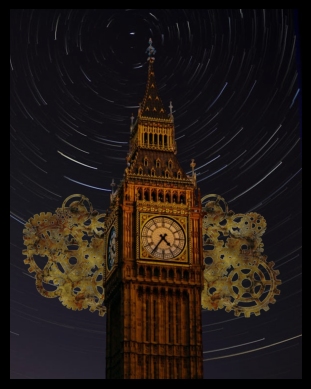

In [51]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取图像，保留Alpha通道
image = cv2.imread('../Processed Pic/London/result2.png', cv2.IMREAD_UNCHANGED)

# 检查图像是否具有Alpha通道
if image.shape[2] == 4:
    b, g, r, a = cv2.split(image)
    rgb_image = cv2.merge([b, g, r])
else:
    rgb_image = image

# 确保图像类型是float32，以避免颜色失真
rgb_image_float = rgb_image.astype(np.float32)

# 将图像稍微变暗（alpha = 0.8 表示降低亮度到原来的80%）
darker_rgb_image = cv2.convertScaleAbs(rgb_image_float, alpha=0.8, beta=0)

# 合并调整后的RGB和原来的Alpha通道
if image.shape[2] == 4:
    darker_image = cv2.merge([darker_rgb_image[..., 0], darker_rgb_image[..., 1], darker_rgb_image[..., 2], a])
else:
    darker_image = darker_rgb_image

# 保存调整后的图像
cv2.imwrite("../Processed Pic/London/result3.png", darker_image)

# 显示调整后的图像
plt.axis('off')
plt.imshow(cv2.cvtColor(darker_image, cv2.COLOR_BGR2RGB))
plt.show()


Test

In [43]:
import cv2
import numpy as np

# 读取视频文件
video = cv2.VideoCapture("../video/time travel.mp4")

# 读取图片
image = cv2.imread('../Processed Pic/London/Big ben-Photoroom.png', cv2.IMREAD_UNCHANGED)

# 获取视频的宽度，高度和帧率
frame_width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = video.get(cv2.CAP_PROP_FPS)

# 创建视频写入对象
output_video = cv2.VideoWriter('../video/video.mp4', cv2.VideoWriter_fourcc(*'mp4v'), fps, (frame_width, frame_height))

# 调整图片大小以适应视频帧
overlay_image = cv2.resize(image, (frame_width, frame_height))

# 分离图片的Alpha通道
if overlay_image.shape[2] == 4:
    overlay_bgr = overlay_image[:, :, :3]
    alpha_channel = overlay_image[:, :, 3] / 255.0
else:
    overlay_bgr = overlay_image
    alpha_channel = np.ones(overlay_image.shape[:2], dtype=overlay_image.dtype)

# 读取视频的每一帧并添加图片
while True:
    ret, frame = video.read()
    if not ret:
        break

    # 将图片叠加到视频帧
    for c in range(0, 3):
        frame[:, :, c] = frame[:, :, c] * (1 - alpha_channel) + overlay_bgr[:, :, c] * alpha_channel

    # 写入处理后的帧到新视频
    output_video.write(frame)

# 释放视频对象
video.release()
output_video.release()
cv2.destroyAllWindows()


In [16]:
import cv2
import imageio

# 读取视频和图片文件
video_path = "../video/time travel.mp4"
image_path = "../High Resolution Pic/Big ben.jpeg"

cap = cv2.VideoCapture(video_path)
img = cv2.imread(image_path)

# 获取视频的一些属性
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# 调整图片大小以适应视频帧
img = cv2.resize(img, (frame_width, frame_height))

# 创建一个空的帧列表来保存合并后的每一帧
frames = []

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    # 将图片叠加到视频帧上
    combined_frame = cv2.addWeighted(frame, 0.7, img, 0.3, 0)
    
    # 将合并后的帧从BGR转换为RGB格式，并添加到帧列表中
    combined_frame_rgb = cv2.cvtColor(combined_frame, cv2.COLOR_BGR2RGB)
    frames.append(combined_frame_rgb)

# 释放资源
cap.release()
cv2.destroyAllWindows()

# 将帧列表保存为GIF文件
output_gif_path = "../Processed Pic/output_animation.gif"
imageio.mimsave(output_gif_path, frames, fps=fps)


In [17]:
import cv2
import imageio

# 读取视频和图片文件
video_path = "../video/time travel.mp4"
image_path = "../High Resolution Pic/Big ben.jpeg"
output_gif_path = "../Processed Pic/output_animation.gif"

cap = cv2.VideoCapture(video_path)
img = cv2.imread(image_path)

# 获取视频的一些属性
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# 调整图片大小以适应视频帧
img = cv2.resize(img, (frame_width, frame_height))

# 创建一个空的帧列表来保存合并后的每一帧
frames = []

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    # 将视频帧调整为与图片相同的大小
    frame_resized = cv2.resize(frame, (img.shape[1], img.shape[0]))
    
    # 将视频帧叠加到图片上
    combined_frame = cv2.addWeighted(img, 0.7, frame_resized, 0.3, 0)
    
    # 将合并后的帧从BGR转换为RGB格式，并添加到帧列表中
    combined_frame_rgb = cv2.cvtColor(combined_frame, cv2.COLOR_BGR2RGB)
    frames.append(combined_frame_rgb)

# 释放资源
cap.release()
cv2.destroyAllWindows()

# 将帧列表保存为GIF文件
imageio.mimsave(output_gif_path, frames, fps=fps)


In [18]:
import cv2
import numpy as np
import imageio

# 读取视频和图片文件
video_path = "../video/time travel.mp4"
image_path = "../High Resolution Pic/Big ben.jpeg"
output_gif_path = "../Processed Pic/output_animation.gif"

cap = cv2.VideoCapture(video_path)
img = cv2.imread(image_path)

# 获取视频的一些属性
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# 调整图片大小以适应视频帧
img = cv2.resize(img, (frame_width, frame_height))

# 创建一个掩码，保留图片中的物体
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, mask = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)

# 创建一个反掩码，用于背景
mask_inv = cv2.bitwise_not(mask)

# 创建一个空的帧列表来保存合并后的每一帧
frames = []

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    # 将视频帧调整为与图片相同的大小
    frame_resized = cv2.resize(frame, (img.shape[1], img.shape[0]))
    
    # 使用掩码保留图片中的物体
    img_fg = cv2.bitwise_and(img, img, mask=mask)
    
    # 使用反掩码保留视频背景
    frame_bg = cv2.bitwise_and(frame_resized, frame_resized, mask=mask_inv)
    
    # 叠加前景和背景
    combined_frame = cv2.add(img_fg, frame_bg)
    
    # 将合并后的帧从BGR转换为RGB格式，并添加到帧列表中
    combined_frame_rgb = cv2.cvtColor(combined_frame, cv2.COLOR_BGR2RGB)
    frames.append(combined_frame_rgb)

# 释放资源
cap.release()
cv2.destroyAllWindows()

# 将帧列表保存为GIF文件
imageio.mimsave(output_gif_path, frames, fps=fps)


In [19]:
import cv2
import numpy as np
import imageio

# 读取视频和图片文件
video_path = "../video/time travel.mp4"
image_path = "../High Resolution Pic/Big ben.jpeg"
output_gif_path = "../Processed Pic/output_animation.gif"

cap = cv2.VideoCapture(video_path)
img = cv2.imread(image_path)

# 获取视频的一些属性
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# 调整图片大小以适应视频帧
img = cv2.resize(img, (frame_width, frame_height))

# 创建一个掩码，保留图片中的物体
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, mask = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)

# 创建一个反掩码，用于背景
mask_inv = cv2.bitwise_not(mask)

# 创建一个空的帧列表来保存合并后的每一帧
frames = []

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    # 将视频帧调整为与图片相同的大小
    frame_resized = cv2.resize(frame, (img.shape[1], img.shape[0]))
    
    # 使用掩码保留图片中的物体
    img_fg = cv2.bitwise_and(img, img, mask=mask)
    
    # 使用反掩码保留视频背景
    frame_bg = cv2.bitwise_and(frame_resized, frame_resized, mask=mask_inv)
    
    # 叠加前景和背景
    combined_frame = cv2.add(img_fg, frame_bg)
    
    # 将合并后的帧从BGR转换为RGB格式，并添加到帧列表中
    combined_frame_rgb = cv2.cvtColor(combined_frame, cv2.COLOR_BGR2RGB)
    frames.append(combined_frame_rgb)

# 释放资源
cap.release()
cv2.destroyAllWindows()

# 将帧列表保存为GIF文件
imageio.mimsave(output_gif_path, frames, fps=fps)
